<p><img alt="SOS logo" height="45px" src="https://raw.githubusercontent.com/dhrou/HEPMLtutorials/master/logo-SOS.jpg" align="left" hspace="10px" vspace="0px"></p> <h1>SOS 2024</h1>

<h1>Hands-on: deep learning</h1>

Author Florian Ruppin

## **Goal of the session**

The aim of this tutorial is to implement a multilayer perceptron neural network for the classification of a large number of images. You will first only use the usual libraries such as numpy and matplotlib to develop all the functions needed to train and use a neural network. You will then use the keras library integrated into the TensorFlow machine learning tool developed by Google. This library will enable you to easily build a neural network and study the impact of its architecture on final performance.

## Coding a neural network from A to Z

First of all, you're going to develop your own neural network with the aim of classifying images from the MNIST (Mixed National Institute of Standards and Technology) database. These images of $28 \times 28$ pixels correspond to handwritten numbers from 0 to 9 (cf. left panel of Fig. 1). Your objective is to train a neural network to associate a number from 0 to 9 with the input image. The architecture of the neural network to be developed is very simple: 
- an input layer containing as many neurons as pixels present in the images to be processed
- a hidden layer containing 10 neurons with a ReLU activation function
- an output layer containing as many neurons as possible class labels, i.e. 10, with a softmax activation function to associate a probability with each class label

The architecture of this neural network is shown in the right-hand panel of Fig.1. It contains two weight matrices $W^0$ and $W^1$ and two bias vectors $b^0$ and $b^1$.

<p style="text-align:center">
    <img alt="Hands on DL" width="800px" src="https://perso.ip2i.in2p3.fr/ruppin/hands_on_dl.jpg" hspace="10px" vspace="0px">
</p>
<p style="text-align:center"><em>Figure 1:</em> <b>Left:</b> Examples of images in the MNIST database. <b>Right:</b> Schematic representation of the neural network to be implemented.</p>

**Import the data**

The lines below allow you to import the data that will be used during this hands-on session.
- How many images are there in the training and test samples?
- How many neurons will there be in the input layer of our network?
- Print the 10 first class labels of the training sample

In [1]:
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0 

# Reshape training and test sample to match input layer
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

2024-05-16 16:03:47.079425: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_train.shape

(60000, 784)

As you can see, the class labels are numbers $i$ between 0 and 9. However, we will need the class labels to take the form of vectors of size 10 with a 1 at the $i^{th}$ position and zeros elsewhere. For example, the number 7 becomes (0,0,0,0,0,0,0,1,0,0).
- Complete the following function that will transform a single digit label into a vector label that can be compared to the output of our newtwork

In [3]:
import numpy as np

def one_hot(Yi):
    """transform image figure into one-hot vector

    Parameters
    ----------
    Yi: int
        the figure value on the image

    Returns
    -------
    array
        a one-hot encoded vector with 1 at the location of the input figure
    """
    one_hot_Yi = np.zeros(10)
    one_hot_Yi[Yi] = 1
    return one_hot_Yi

**Code the network**

The list of functions that we will need in order to train our neural network is the following:
- init_params <em>-- initializes our weights and biases randomly</em>
- ReLU
- Softmax <em>-- the two activation functions that we will consider</em>
- ReLU_deriv <em>-- derivative of the ReLU function</em>
- forward_prop <em>-- forward propagation for a given image</em>
- backward_prop <em>-- backward propagation for a given pair (image, label)</em>
- update_params <em>-- update weight and bias values after data-set full pass</em>

The init_params, ReLU, Softmax, and ReLU_deriv functions are quite easy to code. They are given in the cells bellow.
- Complete the following cells based on the algorithm that we introduced this morning in order to define forward_prop, backward_prop, and update_params

In [4]:
def init_params(N_hidden_neurons):
    """Weight and bias initialization

    Parameters
    ----------
    N_hidden_neurons: int
        number of neurons in hidden layer

    Returns
    -------
    array, array, array, array
        the weight and bias matrices
    """

    # inverse order of line/column for faster memory access
    W0 = np.random.rand(784,N_hidden_neurons) - 0.5
    b0 = np.random.rand(N_hidden_neurons) - 0.5
    W1 = np.random.rand(N_hidden_neurons,10) - 0.5
    b1 = np.random.rand(10) - 0.5
    return W0, b0, W1, b1

In [5]:
def ReLU(Z):
    """ReLU function for the hidden layer

    Parameters
    ----------
    Z: array
        linear combination from previous layer + bias

    Returns
    -------
    array
        output from hidden neuron
    """
    return np.maximum(Z, 0)

In [6]:
def softmax(Z):
    """softmax function for the output layer

    Parameters
    ----------
    Z: array
        linear combination from previous layer + bias

    Returns
    -------
    array
        output from output neuron
    """
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [7]:
def ReLU_deriv(Z):
    """derivative of ReLU function

    Parameters
    ----------
    Z: array
        linear combination from previous layer + bias

    Returns
    -------
    array
        array of boolean (interpreted as 0 in 1 in operations)
    """
    return Z > 0

In [8]:
def forward_prop(W0, b0, W1, b1, Xi):
    """forward propagation for a given image

    Parameters
    ----------
    W0, b0, W1, b1: array
        the weight and bias matrices of the network
    Xi: array
        an image

    Returns
    -------
    array, array, array, array
        the entry and output for each activation function
    """
    Z0 = W0.T.dot(Xi) + b0  # no transpose for W0 because axis swap
    A0 = ReLU(Z0)
    Z1 = W1.T.dot(A0) + b1  # idem
    A1 = softmax(Z1)
    return Z0, A0, Z1, A1

In [9]:
def backward_prop(Z0, A0, A1, W1, Xi, Yi):
    """backward propagation for a given (image, class)

    Parameters
    ----------
    Z0: array
        the entry of hidden activation function
    A0, A1: array
        the output of all activation functions
    Xi, Yi: array
        an image and its associated class

    Returns
    -------
    array, array, array, array
        derivatives of cross-entropy loss wrt weights and biases
    """
    one_hot_Yi = one_hot(Yi)
    delta1i = A1 - one_hot_Yi
    delta0i = ReLU_deriv(Z0) * W1.dot(delta1i)
    dJdW1 = A0[:, None].dot(delta1i[None, :])  #np.outer(A0,delta1i)
    dJdW0 = Xi[:, None].dot(delta0i[None, :])  
    dJdb1 = delta1i
    dJdb0 = delta0i

    return dJdW0, dJdb0, dJdW1, dJdb1

In [10]:
def update_params(W0, b0, W1, b1, dJdW0_arr, dJdb0_arr, dJdW1_arr, dJdb1_arr, alpha):
    """update weight and bias values after data-set full pass

    Parameters
    ----------
    W0, b0, W1, b1: array
        previous weight and bias matrices of the network
    dJdW0_arr, dJdb0_arr, dJdW1_arr, dJdb1_arr: list
        lists of derivatives of cross-entropy loss wrt weights and biases
        for each image in the training sample
    alpha: float
        network learning rate

    Returns
    -------
    array, array, array, array
        updated weight and bias matrices of the network
    """
    D = len(dJdW0_arr) # dJdW0_arr.shape[0]
    W0 = W0 - (alpha / D) * np.sum(dJdW0_arr, axis=0)
    b0 = b0 - (alpha / D) * np.sum(dJdb0_arr, axis=0)
    W1 = W1 - (alpha / D) * np.sum(dJdW1_arr, axis=0)
    b1 = b1 - (alpha / D) * np.sum(dJdb1_arr, axis=0)
    return W0, b0, W1, b1

**Prediction and accuracy**

You will need a function that returns the predicted class label for a given image as well as a function that returns the accuracy of the network in order to record the evolution of the network performance during training. These functions are quite straightforward to code and are given below.

In [11]:
def get_predictions(A1):
    """get predicted value for a given image

    Parameters
    ----------
    A1: array
        the output for each neuron in output layer

    Returns
    -------
    int
        the predicted class of the image
    """
    return np.argmax(A1)


def get_accuracy(predictions, Y):
    """get the accuracy of the network

    Parameters
    ----------
    predictions: list
        the predicted classes for a list of images
    Y: list
        the actual classes for the same images

    Returns
    -------
    float
        the accuracy of the network for the considered set of images
    """
    return np.sum(predictions == Y) / Y.size

**Gradient descent**

You now have all the tools needed to code your own gradient descent function that will train this neural network to recognize the MNIST images.
- Complete the following cell so that the function returns the weight matrices and bias vectors of the trained network. You will use the get_predictions and get_accuracy functions in order to print the accuracy of the network on the training sample every 10 epochs.

In [12]:
def gradient_descent(
    X, Y, alpha, N_hidden_neurons, iterations
):
    """train the neural network

    Parameters
    ----------
    X, Y: array, array
        the images and corresponding classes for the
        training sample
    alpha: float
        the learning rate
    N_hidden_neurons: int
        number of neurons in hidden layer
    iterations: int
        number of iterations for the wight and bias updates

    Returns
    -------
    array, array, array, array
        weight and bias matrices of the trained network
    """
    W0, b0, W1, b1 = init_params(N_hidden_neurons)
    for i in range(iterations):
        dJdW0_list, dJdb0_list, dJdW1_list, dJdb1_list, A1_list = [], [], [], [], []
        for j in range(X.shape[1]):
            Z0, A0, Z1, A1 = forward_prop(W0, b0, W1, b1, X[j,:])
            dJdW0, dJdb0, dJdW1, dJdb1 = backward_prop(Z0, A0, A1, W1, X[j,:], Y[j])
            dJdW0_list.append(dJdW0)
            dJdb0_list.append(dJdb0)
            dJdW1_list.append(dJdW1)
            dJdb1_list.append(dJdb1)
            A1_list.append(A1)
        W0, b0, W1, b1 = update_params(
            W0, b0, W1, b1, dJdW0_list, dJdb0_list, dJdW1_list, dJdb1_list, alpha
        )
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = [get_predictions(A1i) for A1i in A1_list[:100]]
            print(get_accuracy(predictions, Y[:100]))

    return W0, b0, W1, b1

- Test your gradient_descent function using a learning rate of 1 and 100 epochs. What is the final accuracy of your network?

In [13]:
N_hidden_neurons = 10
learning_rate = 1.0
W0, b0, W1, b1 = gradient_descent(
    x_train, y_train, learning_rate, N_hidden_neurons, 100
)

Iteration:  0
0.15
Iteration:  10
0.54
Iteration:  20
0.65
Iteration:  30
0.63
Iteration:  40
0.75
Iteration:  50
0.72
Iteration:  60
0.83
Iteration:  70
0.73
Iteration:  80
0.94
Iteration:  90
0.92


-Check that your network works by running the following cell

Prediction:  6
Actual class label:  6


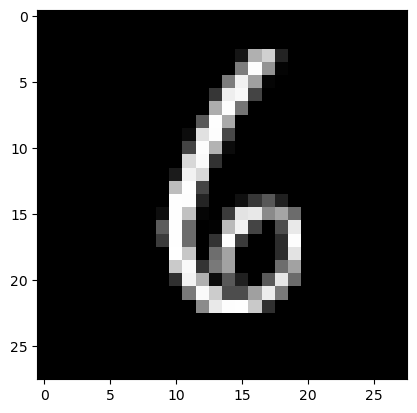

Prediction:  1
Actual class label:  1


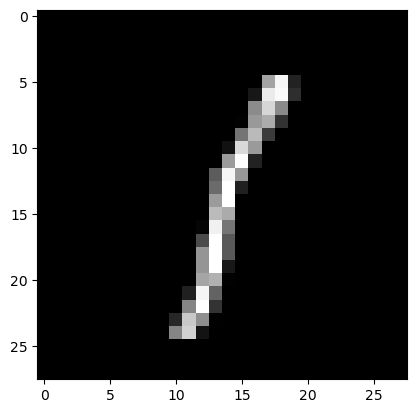

Prediction:  1
Actual class label:  1


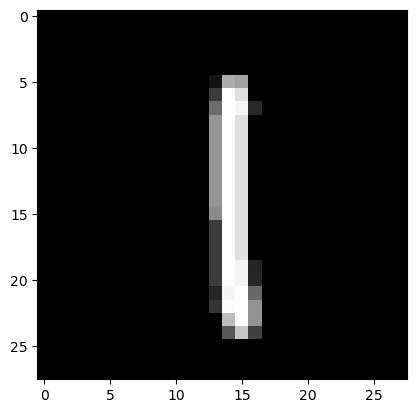

Prediction:  1
Actual class label:  1


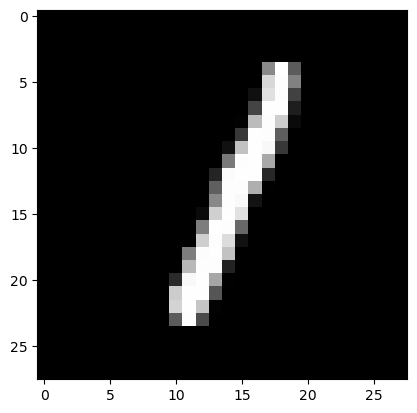

In [14]:
import matplotlib.pyplot as plt

def make_prediction(X, W0, b0, W1, b1):
    """predict the class of a given image

    Parameters
    ----------
    X: array
        an test image
    W0, b0, W1, b1: array
        weight and bias matrices of the trained network

    Returns
    -------
    int
        predicted class of the image
    """
    _, _, _, A1 = forward_prop(W0, b0, W1, b1, X)
    prediction = get_predictions(A1)
    return prediction

def test_prediction(index, W0, b0, W1, b1):
    """show a test image and print its predicted and
        its actual class

    Parameters
    ----------
    index: int
        position in the test sample
    W0, b0, W1, b1: array
        weight and bias matrices of the trained network

    """
    current_image = x_test[index,:]
    prediction = make_prediction(x_test[index,:], W0, b0, W1, b1)
    label = y_test[index]
    print("Prediction: ", prediction)
    print("Actual class label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation="nearest")
    plt.show()

test_prediction(np.random.randint(0,x_test.shape[0]), W0, b0, W1, b1)
test_prediction(np.random.randint(0,x_test.shape[0]), W0, b0, W1, b1)
test_prediction(np.random.randint(0,x_test.shape[0]), W0, b0, W1, b1)
test_prediction(np.random.randint(0,x_test.shape[0]), W0, b0, W1, b1)

## Using TensorFlow

You will now use the keras module of the tensorflow library in order to train the same neural network and compare its performance with the one you just coded.

- Use the <em>to\_categorical</em> function in <em>keras.utils</em> to transform the numbers contained in y_train and y_test (class labels associated with the images) into vectors of 10 values containing a 1 at the position corresponding to the number displayed in each image.

In [28]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.utils import to_categorical

# Extract MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize it
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape training and test sample to match input layer
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

# Transform image classes into one-hot vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

- Use the <em>Sequential</em> module in <em>keras.models</em> to initialize a model object corresponding to your neural network. Use the <em>add</em> method associated with your model object to add the hidden layer of 10 neurons with a ReLU activation function. You will define it using the <em>Dense</em> module of <em>keras.layers</em>. Finally, add the output layer of 10 neurons with a softmax activation function.

In [29]:
# Build the network architecture
model = Sequential()
model.add(Dense(10, activation="relu", kernel_regularizer='l2'))
model.add(Dense(10, activation="softmax"))

Now that the architecture of your neural network is defined you will need to specify the minimizer and its learning rate as well as the loss function to consider during training.
- Use the <em>Adam</em> function in <em>keras.optimizers</em> to initialize an object called opt corresponding to the method used to minimize the loss function. Consider a learning rate of $10^{-2}$.
- Use the <em>compile</em> method associated with your model object to associate the opt object with your neural network. You'll use <em>categorical_crossentropy</em> as the loss function, and you'll also request access to the evolution of the success rate as a function of the iterations of the training phase by adding the keyword $\mathrm{metrics=['accuracy']}$.

In [30]:
# Define the minimizer to consider and its learning rate
opt = keras.optimizers.Adam(learning_rate=1e-2)
# Define the loss function to consider and the metrics to save during training
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

- Use the <em>fit</em> method associated with your model object to train your neural network from the x_train and y_train arrays. Set the batch_size option to the number of images in x_train and the number of iterations (epochs) to 300. Also use the validation_data option to give the x_test and y_test arrays so that the success rate is calculated for the test sample at each epoch of training. Store the output of this training phase in a variable called out.

In [31]:
out = model.fit(
    x_train,
    y_train,
    batch_size=6000,
    epochs=300,
    validation_data=(x_test, y_test),
    verbose=1,
)

Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3160 - loss: 2.1220 - val_accuracy: 0.6772 - val_loss: 1.2964
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6985 - loss: 1.2272 - val_accuracy: 0.7517 - val_loss: 0.9958
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7624 - loss: 0.9726 - val_accuracy: 0.8609 - val_loss: 0.8288
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8591 - loss: 0.8137 - val_accuracy: 0.8797 - val_loss: 0.6904
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8738 - loss: 0.6929 - val_accuracy: 0.8885 - val_loss: 0.6120
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8863 - loss: 0.6200 - val_accuracy: 0.8959 - val_loss: 0.5642
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8935 - loss: 0.5735 - val_accuracy: 0.9006 - val_loss: 0.5300
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8986 - loss: 0.5379 - val_accuracy: 0.

- Check the different keys associated with the out.history dictionnary
- Plot the evolution of the loss function and success rate for the training and validation samples as a function of the number of epochs. What is the maximum success rate achieved with this neural network architecture? Does it appear to have converged? Increase the number of epochs in the training phase so that it converges to within $\sim10^{-3}$. What maximum value do you obtain?
- Perform the same training with a learning rate of $0.2$. What is your maximum success rate?
- Change the number of neurons in the hidden layer, add an extra hidden layer, change the size of the batch size, and check the impact of these changes on the succes rate.
- What do you notice about the loss function of the validation sample if you use a network with two hidden layers and a small batch size? 

In [32]:
out.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

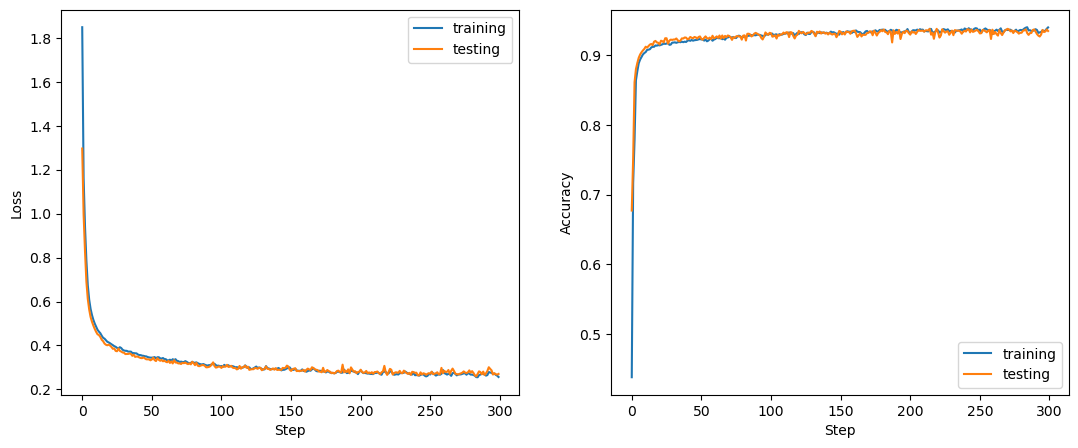

In [33]:
def plot_results(loss, accuracy, loss_val, accuracy_val):
    """plot the evolution of training metrics

    Parameters
    ----------
    loss, accuracy: array
        value of loss function and network accuracy
        for the training sample
    loss_val, accuracy_val: array
        value of loss function and network accuracy
        for the test sample

    """

    fig, ax = plt.subplots(1, 2, figsize=(13, 5))
    # training/test loss
    ax[0].plot(loss, label="training")
    ax[0].plot(loss_val, label="testing")
    ax[0].set_xlabel("Step")
    ax[0].set_ylabel("Loss")
    ax[0].legend()
    # training/test accuracy
    ax[1].plot(accuracy, label="training")
    ax[1].plot(accuracy_val, label="testing")
    ax[1].set_xlabel("Step")
    ax[1].set_ylabel("Accuracy")
    ax[1].legend()
    plt.show()

plot_results(
    out.history["loss"],
    out.history["accuracy"],
    out.history["val_loss"],
    out.history["val_accuracy"],
)